In [1]:
from mavis import *

%load_ext line_profiler

In [2]:
xx, yy = np.linspace(-15, 15,11), np.linspace(-15,15,11)
cartPointingCoords =  np.dstack(np.meshgrid(xx, yy)).reshape(-1, 2)
NGS_flux = [10000, 30000, 5000]
NGS_SR_1650 = [0.4, 0.2, 0.6]
NGS_FWHM_mas = [90, 110, 85]
polarNGSCoords = np.asarray([[30.0,0.0], [50.0,100.0],[10.0,240.0]])
#polarNGSCoords = np.asarray([[10.0,0.0], [10.0,120.0],[10.0,240.0]])
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
mLO = MavisLO("/home/frossi/dev/MASTSEL/", 'mavisParams', 'data/windpsd_mavis.fits')

In [7]:
%%time 
Ctot = mLO.computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

CPU times: user 1.56 s, sys: 300 ms, total: 1.86 s
Wall time: 1.86 s


In [8]:
%lprun -f MavisLO.computeTotalResidualMatrix Ctot = mLO.computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

Timer unit: 1e-06 s

Total time: 2.71856 s
File: /home/frossi/dev/MASTSEL/mavisLO.py
Function: computeTotalResidualMatrix at line 436

Line #      Hits         Time  Per Hit   % Time  Line Contents
   436                                               def computeTotalResidualMatrix(self, aCartPointingCoords, aCartNGSCoords, aNGS_flux, aNGS_SR_1650, aNGS_FWHM_mas):
   437         1          8.0      8.0      0.0          nPointings = aCartPointingCoords.shape[0]
   438         1         16.0     16.0      0.0          C1 = np.zeros((2,2))
   439         1          5.0      5.0      0.0          Cnn = np.zeros((6,6))
   440         1        211.0    211.0      0.0          maxFluxIndex = np.where(aNGS_flux==np.amax(aNGS_flux))
   441         4          9.0      2.2      0.0          for starIndex in [0,1,2]:
   442         3     893316.0 297772.0     32.9              bias, amu, avar = self.computeBias(aNGS_flux[starIndex], aNGS_SR_1650[starIndex], aNGS_FWHM_mas[starIndex]) # one scalar, 

In [ ]:
print('Ctot', Ctot)
#Ctot [[[18545.18136324  3308.78460439]
#  [ 3308.78460439 20872.5522838 ]]
# [[28.59791617 -3.8054102  35.15831592 -1.7180003  46.33356834 -0.51767148]
#  [-3.8054102  38.74567669 -1.7180003  17.85779335 -0.51767148 46.82192702]]

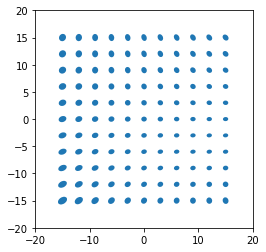

In [5]:
%matplotlib inline
cov_ellipses = mLO.ellipsesFromCovMats(Ctot)
plotEllipses(cartPointingCoords, cov_ellipses, 0.2)

In [5]:
#%%time
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas, True)
print('Ctot', Ctot)
Ctot = np.asarray(Ctot)
cov_ellipses = ellipsesFromCovMats(Ctot)

NameError: name 'computeTotalResidualMatrix' is not defined

In [6]:
scale =1.0
print(0.5 * np.arctan( 2*-2405.86006388 / ( 12145.83654855-14191.5529846 )))
print(np.sqrt( 0.5 * ( 2*-2405.86006388 / np.sin(2*0.5843981184677838) + 12145.83654855+14191.5529846) ) / scale)
print( np.sqrt(12145.83654855+14191.5529846-10554.42592401998)/scale )
# manca conversione da nanometri a mas:


0.5843981184677838
102.73473572273393
125.63026549812757


In [7]:
%%timeit
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

3.23 s ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
